### Linear map examples

Do a linear map called a **shearing**.  Do the linear map  as matrix mutliplication

$$
\left\lbrack   
\begin{array}{cc}
1 & 0\\
k & 1
\end{array}
\right \rbrack
\left\lbrack   
\begin{array}{cc}
x\\
y
\end{array}
\right \rbrack
= 
\left\lbrack 
\begin{array}{cc}
x\\
kx + y
\end{array}
\right \rbrack
$$

Also rotation.  Also create plots by srawong vertices of regular polygons.
Form of rotation:

$$
\left\lbrack
\begin{array}{lr}
\cos \theta & -\sin\theta\\
\sin \theta & \cos\theta
\end{array}
\right \rbrack
$$

For example,

$$
\left\lbrack
\begin{array}{rr}
\cos 3\pi/2 & -\sin 3\pi/2\\
\sin 3\pi/2 & \cos 3\pi/2
\end{array}
\right \rbrack
= 
\left\lbrack
\begin{array}{rr}
 0 & 1\\
-1 & 0
\end{array}
\right \rbrack
$$

In [51]:
import numpy as np
from matplotlib import pyplot as plt

########################################################################
###    F n s    M a n i p u l a t i n g     P o i n t    S e t s
########################################################################

def make_boxed_dotted_polygon (n,k=30,radius=1):
    #  Get point sets
    vs = make_regular_polygon_set (5, k=k,radius=radius)
    vs = add_dot(vs)
    return set_union(vs,make_box(k=k))


def make_regular_polygon_set (n,iters=None,k=None,radius=1):
    """
    n is the number of sides of the regular polygon
    
    k is the number of points to be drawn for a side (minus the vertices). k = 10 is a good number
    k=1 means one point will be draw between each vertex.
    Observation: the higher n is, the lower k should be, if marker size stays constant
    """
    thetas = get_thetas_for_regular_polygon (n)
    xs = radius * np.cos(thetas)
    ys = radius * np.sin(thetas)
    # Make the segment coord lists cyclical
    xs = np.concatenate([xs[-1:],xs])
    ys = np.concatenate([ys[-1:],ys])
    # Sprinkle points between vertices
    if iters is not None:
        newxs = interpolate (xs,iters)
        newys = interpolate (ys,iters)
    elif k is not None:
        newxs = interpolate2 (xs,k=k)
        newys = interpolate2 (ys,k=k)
    else:
       assert iters is not None or k is not None, "Must supply value for k or n"
    #  This is the polygon points as a vector seq
    #  suitable to apply a linear transformation to.
    return make_vector_seq(newxs,newys)


def interpolate (xs,iterations=1):
    """
    x: a numpy array
    for each iteration:
       xs is reassigned a new array with a new interpolated val `iv` inserted between each
       `xs[i]` and `xs[i+1]`  where `iv` is the avg of `xs[i]`  and `xs[i+1]`
       The length of the new array is 2*len(xs) -1
    """
    def get_avg (xi,xj):
        return (xj+xi)/2 

    while iterations:
        last = xs[-1:]
        intrpd = [j for i in range(0,len(xs)-1) for j in (xs[i], get_avg(xs[i],xs[i+1]))]
        xs = np.concatenate([intrpd,last])
        iterations -= 1
    return xs

def interpolate2 (xs,k):
    """
    x: a numpy array of montonically increasing valus.
    xs is reassigned a new array with new interpolated vals `ivs` inserted between each
    `xs[i]` and `xs[i+1]`  where `len(ivs)=k` and the interpolated values are evenly spaced 
    between `xs[i]`  and `xs[i+1]`.
    
    When xs is the x/y-coords of vertices on a polygon, this fills in k points lying on each side.
    """
    last = xs[-1:]
    intrpd = [j for i in range(0,len(xs)-1) for j in  np.linspace(xs[i],xs[i+1],k+2)]
    xs = np.concatenate([intrpd,last])
    return xs

def make_vector_seq (xx,yy):
    """
    xx and yy are 1D aligned x and y coords; Return the corresponding
    vector seq array M: M[0,j] = xx[j]; M[1,j]=yy[j]
    
    This configures the points as a "vector seq"
    suitable to apply a 2D linear transformation array to.
    """
    return np.concatenate([xx[np.newaxis,:],yy[np.newaxis,:]],axis=0)



def get_thetas_for_regular_polygon (n):
    """
    W/o loss of generality: Assuming there's a vertex at theta=pi/2.
    Can always rotate to render a different orientation.
    """
    twopi= 2 * np.pi
    delta = twopi/n
    tmax = np.pi/2 + (n-1)*delta
    return np.arange(tmax%twopi,tmax,delta )


def add_dot (vs):
    dot = np.array([0,.75]).reshape((-1,1))
    return np.concatenate([vs,dot],axis=1)

def make_box (k=50):
    """
    square circumscribing unit circle, with sides parallel
    to x and y axis.
    """
    vs = make_regular_polygon_set (4,k=k,radius=np.sqrt(2))
    return rotate(np.pi/4)@vs

def set_union (vs,ws):
    """
    vs and ws are two vector sequences (point sets).
    Return their union.  NB not checking for duplicates.
    """
    return np.concatenate([vs,ws],axis=1)

def make_meshgrid (xmin,xmax,ymin=None,ymax=None, delta=.1):
    """
    Returns a mesh of points ("solidly" filled).  Other code in this
    NB returns vertices and the lines between them, but no fill.
    
    Meshgrid trick only works for producing rectangular point sets.
    
    However these can be rotated, sheared, unioned, to give other shapes.
    """
    if ymin is None:
        ymin = xmin
    if ymax is None:
        ymax = xmax
    xv, yv = np.meshgrid(np.arange(xmin,xmax,delta), np.arange(ymin,ymax,delta), indexing='ij')
    return xv.ravel(),yv.ravel()


def make_mesh_circle  (delta=.05):
    """
    Unit disc radius < 1.
    """
    xx, yy = make_meshgrid (-1,1,-1,1, delta=delta)
    vs = make_vector_seq (xx,yy)
    # Take norm order 2 along 0 axis
    l2_norm = np.linalg.norm(vs, 2, axis=0)
    return vs[:,l2_norm<=1]
    
 
########################################################################
###   P l o t t i n g     F n s
########################################################################

def draw_Xn(M=None,r=None,draw_r=True,
            radius=1,ax=None,figsize=(4,4),
            lims=None,xlim=None,ylim=None,
            title=None,c1=None,c2=None,s=8,
            no_ticks=True):
    """
    The workhorse top level drawing function with
    options.  M is a linear transformation (a 2x2 array)
    r is a vector sequence (a 2xN array).  Draw the transofrmed
    version of r.
    
    draw_R = True draws r before Xn as well.
    """
    if M is None:
        M = np.eye(2)
    if r is None:
        # Use the unit circle
        xs = np.cos(np.linspace(0,2*np.pi,50))
        ys = np.sin(np.linspace(0,2*np.pi,50))
        r = make_vector_seq(xs,ys)
    r_T = M@r
    if ax is None:
        fig,ax= plt.subplots(1,1,figsize=figsize)
    #ax.scatter(xx,new_yy,s=10)
    if draw_r:
        #ax.scatter(xx,yy,s=8,alpha=.5)
        ax.scatter(r[0,:],r[1,:],s=s,alpha=.5,c=c1)
    ax.scatter(r_T[0,:],r_T[1,:],s=s,alpha=.5,c=c2)
    if lims is None:
        lims = 1.5 * radius * np.array([-1,1])
    if xlim is None:
        xlim = lims
    if ylim is None:
        ylim = lims
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    if title is not None:
        ax.set_title(title)
    if no_ticks:
        remove_ticks(ax)
    return ax
 
def remove_ticks (ax,left=False,labelleft=False,labelbottom=False,bottom=False):
    ax.tick_params(left = left, #right = False , 
                   labelleft = labelleft,  labelbottom = labelbottom, bottom = bottom) 
    
def plot_x_y (xs,ys,ax=None):
    if ax is None:
        fig,ax= plt.subplots(1,1,figsize=(4,4))
    ax.scatter(newxs,newys,s=6,alpha=.5)
    ax.set_xlim([-1.1,1.1])
    ax.set_ylim([-1.1,1.1])
    
########################################################################
###   T r a n s f o r m a t i o n s
########################################################################
    
def make_H (f):
    return np.array([[1,0],[f,1]])

def make_J (f):
    return np.array([[1,f],[0,1]])

def make_K ():
    """
    Permutation matrix
    """
    return np.array([[0,1],[1,0]])

def make_D (d1,d2=None):
    """
    2D Dilation matrix.
    d1 is sclaing factor in x dimension;
    d2 in y.
    """
    if d2 is None:
        d2 = d1
    return np.diag(np.array([d1,d2]))
    #return np.array([[d1,0],[0,d2]])
           
def rotate(theta):
    return np.array([[np.cos(theta),-np.sin(theta)],
                     [np.sin(theta),np.cos(theta)]])

def LinMap (d,o):
    """
    The map for the matrix:
   
       |2  1|
       |1  2|    
    """
    return  np.array([[d,o],[o,d]])             #((2*x) + y, x + (2*y))

#### Using get_thetas_for_regular_polygon and make_vector_seq

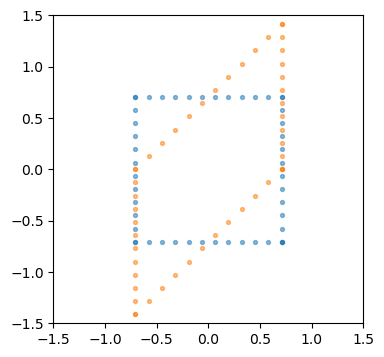

In [2]:
import numpy as np 
from matplotlib import pyplot as plt

# The thetas for a pentagon inscribed in the unit circle with one vertex at (0,pi/2)
# 21 * pi/10 = pi/2 + (4 * 2pi/5) = (5*pi/10 + 16*pi/10)
n=4
thetas = get_thetas_for_regular_polygon (n)

iters = 4
# The number of points on a side (excluding vertices); settiong k means you use interpolate2
# Observation the higher n is, the lower k should be, if marker size stays constant
k=10
xs = np.cos(thetas)
ys = np.sin(thetas)
# Make the lists cyclical
xs = np.concatenate([xs[-1:],xs])
ys = np.concatenate([ys[-1:],ys])
# Sprinkle points 
#newxs = interpolate (xs,iters)
#newys = interpolate (ys,iters)
newxs = interpolate2 (xs,k=k)
newys = interpolate2 (ys,k=k)

#  This is the polygon points as a vectro seq
#  suitable to apply a linear transformation to.
vs = make_vector_seq(newxs,newys)

M = rotate(np.pi/4)
vs = M@vs
# Dont rotate
#M = np.eye(2)
f = 1
# The shear transformations are usually called J and H
J = np.array([[1,f],[0,1]])
H = np.array([[1,0],[f,1]])
ax = draw_Xn(H,vs,draw_r=True)

### An example using a mesh

We reproduce the previous
transformation using the meshgrid trick: Only works for rectangularly arranged point sets

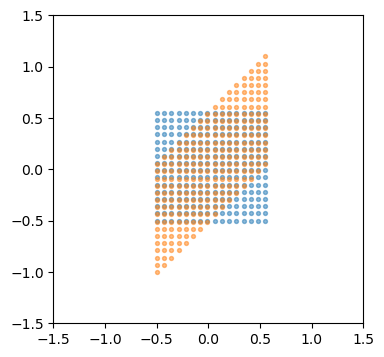

In [397]:
  
#xv, yv = np.meshgrid(np.arange(-.5,.6,.1), np.arange(-.5,.6,.1), indexing='ij')
#xx,yy = xv.ravel(),yv.ravel()

xx,yy = make_meshgrid (-.5,.6, delta=.07)
f=1
H = np.array([[1,0],[f,1]])
r = make_vector_seq (xx,yy)
ax = draw_Xn(H,r,draw_r=True)

We apply cosine sine and get values betyween -1 and 1 with interesting texture.  We apply H.

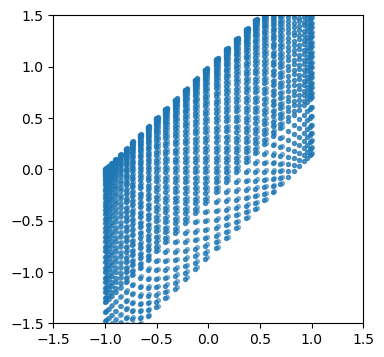

In [341]:
xx,yy = make_meshgrid (-2.5,5.6, -1, 3.5, delta=.1)
arc_xx,arc_yy = np.cos(xx),np.sin(yy)
r = make_vector_seq (arc_xx,arc_yy)
ax = draw_Xn(H,r,draw_r=False)

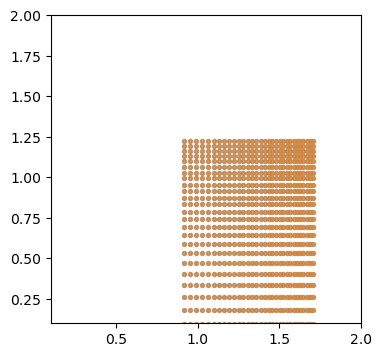

In [393]:
xx,yy = make_meshgrid (2.5,5.6, 1, 3.5, delta=.1)
arc_xx,arc_yy = np.log(xx),np.log(yy)
r = make_vector_seq (arc_xx,arc_yy)
ax = draw_Xn(np.eye(2),r,draw_r=True,xlim=(.1,2),ylim=(.1,2))

### Transformations on regular polygons

We show a pentagon before (blue) and after (orange) rotating by $\pi/4$.  

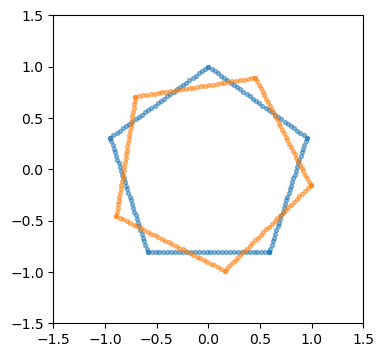

In [344]:
n=5
vs = make_regular_polygon_set (n, k=30,radius=1)
M= rotate(np.pi/4)
ax = draw_Xn(M,vs,draw_r=True)

Figure on left: Shear Xn applied to a square inscribed in the unit circle (not shown), with one vertex on the y-axis

Figure on right: Shear Xn applied to the same  square after rotating it by $\pi/4$.

<AxesSubplot:>

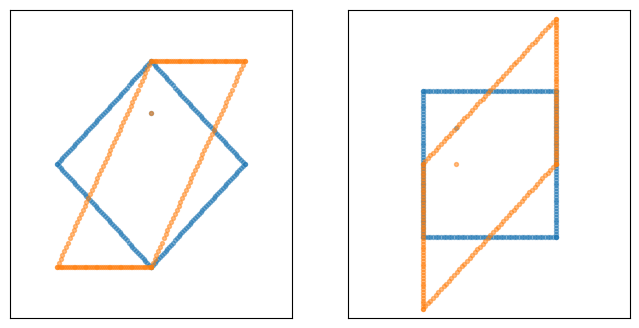

In [432]:
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(8,4))
vs = make_regular_polygon_set (4, k=50,radius=radius)
vs = add_dot(vs)
R45 = rotate(np.pi/4)
vs2 = R45@vs
f = 1
# The shear transformations are usually called J and H
H = np.array([[1,0],[f,1]])
draw_Xn(H, vs, draw_r=True,ax=ax0,radius=1.5)
draw_Xn(H, vs2, draw_r=True,ax=ax1,radius=1.5)

Hypothesis H doesnt preserve angle or length bu it does preserve parallelism.

The default set of points for `draw_Xn` is the unit circle.

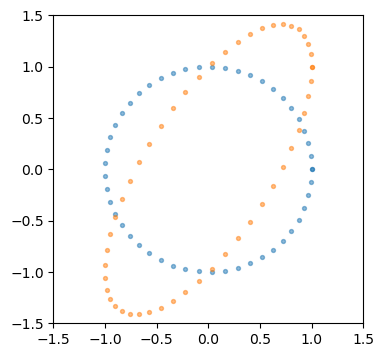

In [351]:
ax = draw_Xn(H)

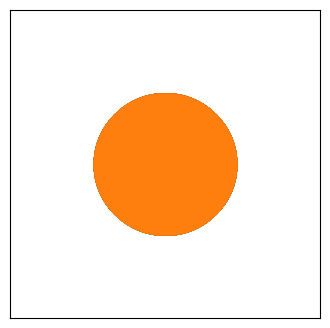

In [45]:
#  Using this  resolutio (delta=.001) takes a while
#  but produces a nice circle.
vs=make_mesh_circle(delta=.001)
ax = draw_Xn(np.eye(2), vs,radius=1.5)

<AxesSubplot:>

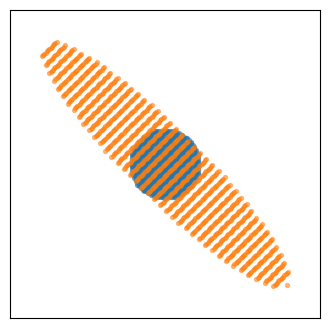

In [46]:
vs = make_mesh_circle(delta=.05)
d1,d2=1,5
D21 = make_D(d1,d2)
R45 = rotate(np.pi/4)
draw_Xn(R45@D21, vs,radius=3)

### An extended example

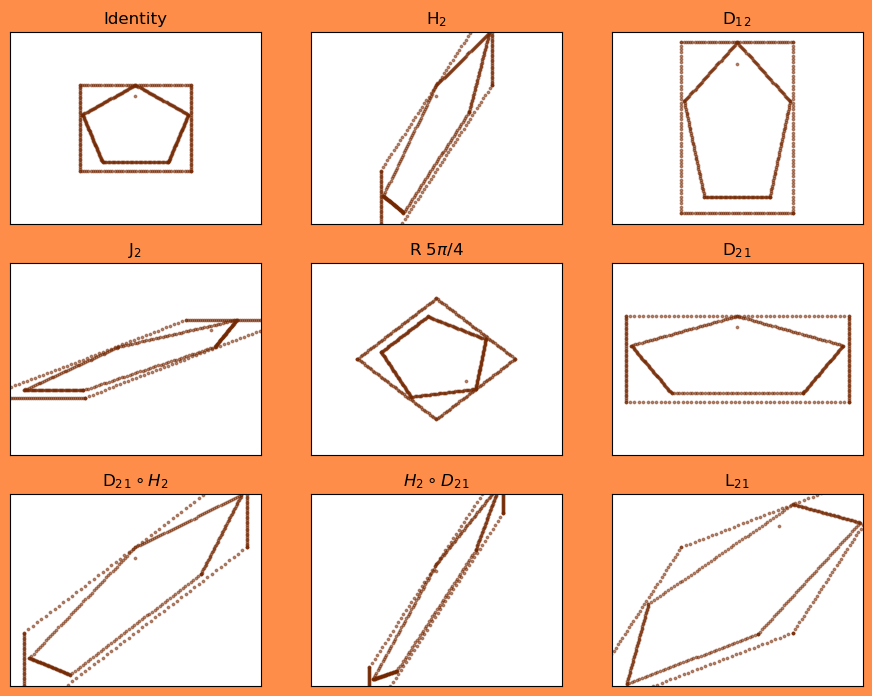

In [61]:
import matplotlib._color_data as mcd
# colors = mcd.XKCD_COLORS
# Also mcd.CSS4_COLORS

k=50

#  Get point sets
vs = make_regular_polygon_set (5, k=k,radius=1)
vs = add_dot(vs)
ws = set_union(vs,make_box(k=k))

f = 2
# The shear transformations are usually called J and H
H = make_H(f) # np.array([[1,0],[f,1]])
J = make_J(f) # np.array([[1,f],[0,1]])
I = np.eye(2)
#pi_num,pi_denom = 3,2  # A minus sign away from permutation
pi_num,pi_denom = 5,4  # 
theta = pi_num*np.pi/pi_denom
Rtheta = rotate(theta)
d1,d2 = 1,2
D12 = make_D(d1,d2)
D21 = make_D(d2,d1)
K = make_K()


# colors that are ok: "lightblue","firebrick","aqua","xkcd:cool grey"
fig, axes = plt.subplots(3,3,figsize=(11,8.5),facecolor="xkcd:orangeish")
((ax0,ax1,ax2), (ax3,ax4,ax5), (ax6, ax7, ax8),) = axes

for ax in axes.flatten():
    remove_ticks(ax)

radius=1.5
pixelcolor,size = 'xkcd:chestnut',3


draw_Xn(I, ws, draw_r=False,ax=ax0,title="Identity",radius=radius,c2=pixelcolor,s=size)
draw_Xn(H, ws, draw_r=False,ax=ax1,title=f"H$_{f}$",radius=radius,c2=pixelcolor,s=size)
draw_Xn(D12, ws, draw_r=False,ax=ax2,radius=radius,title=f"D$_{d1}$$_{d2}$",c2=pixelcolor,s=size)
draw_Xn(J, ws, draw_r=False,ax=ax3,radius=1.65,title=f"J$_{f}$",c2=pixelcolor,s=size)
draw_Xn(Rtheta, ws, draw_r=False,ax=ax4,radius=radius,title=f"R ${pi_num}\pi/{pi_denom}$",c2=pixelcolor,s=size)
# K is pretty uninteresting looks too much like a rotation by 3pi/2
#draw_Xn(K, ws, draw_r=False,ax=ax5,radius=2,title="Permutation",c2='xkcd:goldenrod')
draw_Xn(D21, ws, draw_r=False,ax=ax5,radius=radius,title=f"D$_{d2}$$_{d1}$",c2=pixelcolor,s=size)

draw_Xn(D21@H, ws, draw_r=False,ax=ax6,radius=radius,title=f"D$_{d2}$$_{d1}\circ H_{f}$",c2=pixelcolor,s=size)
draw_Xn(H@D21, ws, draw_r=False,ax=ax7,radius=2.5,title=f"$H_{f}\circ D_{d2}$$_{d1}$",c2=pixelcolor,s=size)


d,o=2,1
L = LinMap(d,o)

ax = draw_Xn(L, ws, draw_r=False,ax=ax8,radius=radius,title=f"L$_{d}$$_{o}$",c2=pixelcolor,s=size)

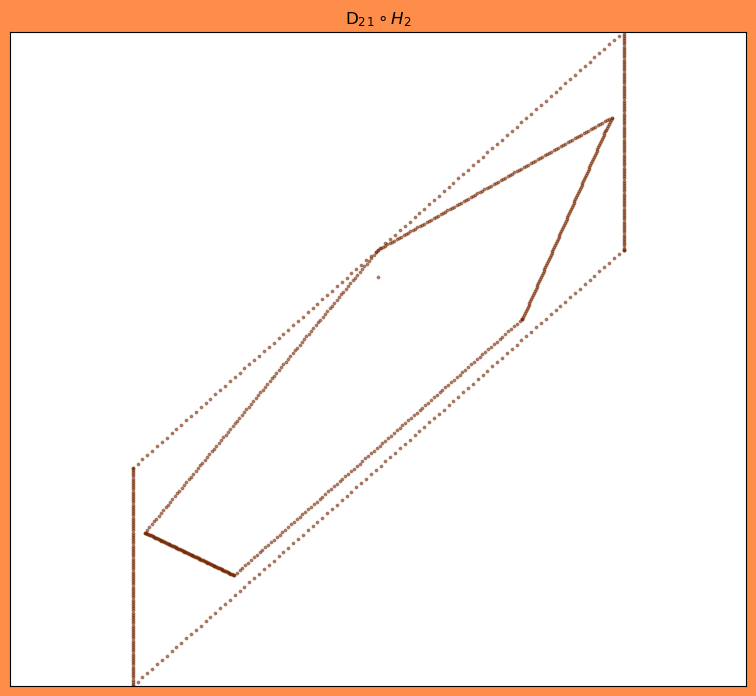

In [429]:
ws = make_boxed_dotted_polygon (n,k=100,radius=1)
fig, ax = plt.subplots(1,1,figsize=(9.5,8.5),facecolor="xkcd:orangeish")
#remove_ticks(ax)
ax= draw_Xn(D21@H, ws, draw_r=False,ax=ax,radius=2,
        title = f"D$_{d2}$$_{d1} \circ H_{f}$",
        c2=linecolor,s=size)

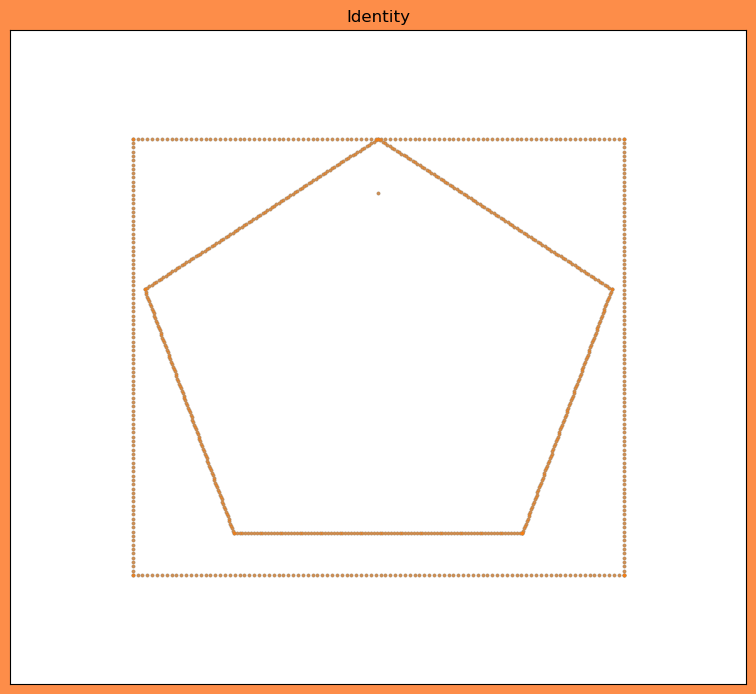

In [65]:
fig, ax = plt.subplots(1,1,figsize=(9.5,8.5),facecolor="xkcd:orangeish")

k=100

#  Get point sets
vs = make_regular_polygon_set (5, k=k,radius=1)
vs = add_dot(vs)
ws = set_union(vs,make_box(k=k))
I = np.eye(2)
ax=draw_Xn(I, ws, draw_r=True,ax=ax,radius=1,
        title = f"Identity",s=size)

Using L variants on a meshgrid:

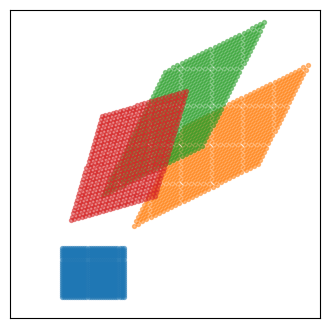

In [431]:
xx,yy = make_meshgrid (2.5,5.6, 1, 3.5, delta=.1)
r = make_vector_seq (xx,yy)
d,o=2,1
L1 = LinMap(d,o)
L2 = LinMap(o,d)
#L3 = LinMap(1.3,1.8)
L3 = LinMap(.5,1.7)

ax1 = draw_Xn(L1,r,draw_r=True,xlim=(0,15),ylim=(0,15))
ax1 = draw_Xn(L2,r,draw_r=False,xlim=(0,15),ylim=(0,15),ax=ax1)
ax1 = draw_Xn(L3,r,draw_r=False,xlim=(0,15),ylim=(0,15),ax=ax1)

### Apply Xns to data

Nothing much to see visually.  Just an example of how to try this code out on a data set.

For most data sets there are three steps. Make 2D. Transpose.  Adjust the plot bounds.  Coloring by
class is easy.

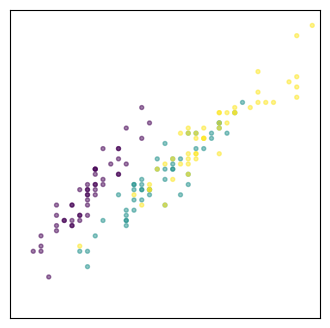

In [80]:
from sklearn import datasets

iris = datasets.load_iris()
f = iris['data']
target = iris['target']
# Data must be 2xN
f2D = f[:,:2].T
#d,o=2,1
#L1 = LinMap(d,o)
H = make_H(1)
lbd,ubd = 4,12
ax = draw_Xn(H,f2D,draw_r=False,xlim=(lbd,ubd-4),ylim=(lbd+2,ubd),c2=target)